In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

2024-06-10 15:33:14.895548: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 15:33:14.895677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 15:33:15.072249: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
train_dir = "/kaggle/input/cars-image-dataset/Cars Dataset/train"
test_dir =  "/kaggle/input/cars-image-dataset/Cars Dataset/test"

In [ ]:
batch_size = 32
img_width, img_height = 128, 128



train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=True
)


test_datagen = ImageDataGenerator(
    rescale=1./255
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=False
)


print("Classes found in training set: ", train_generator.class_indices)
print("Classes found in test set: ", test_generator.class_indices)

Found 3352 images belonging to 7 classes.
Found 813 images belonging to 7 classes.
Classes found in training set:  {'Audi': 0, 'Hyundai Creta': 1, 'Mahindra Scorpio': 2, 'Rolls Royce': 3, 'Swift': 4, 'Tata Safari': 5, 'Toyota Innova': 6}
Classes found in test set:  {'Audi': 0, 'Hyundai Creta': 1, 'Mahindra Scorpio': 2, 'Rolls Royce': 3, 'Swift': 4, 'Tata Safari': 5, 'Toyota Innova': 6}


# **AlexNet**

In [ ]:
def AlexNet():
    inp = layers.Input((img_width, img_height, 3))
    x = layers.Conv2D(96, kernel_size=11, strides=4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2)(x)
    x = layers.Conv2D(256, kernel_size=5, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2)(x)
    x = layers.Conv2D(384, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(384, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(7, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

model_Alex = AlexNet()
model_Alex.summary()


write a python code to build alexnet

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │        28,679 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,756,999 (94.44 MB)

 Trainable params: 24,756,295 (94.44 MB)

 Non-trainable params: 704 (2.75 KB)

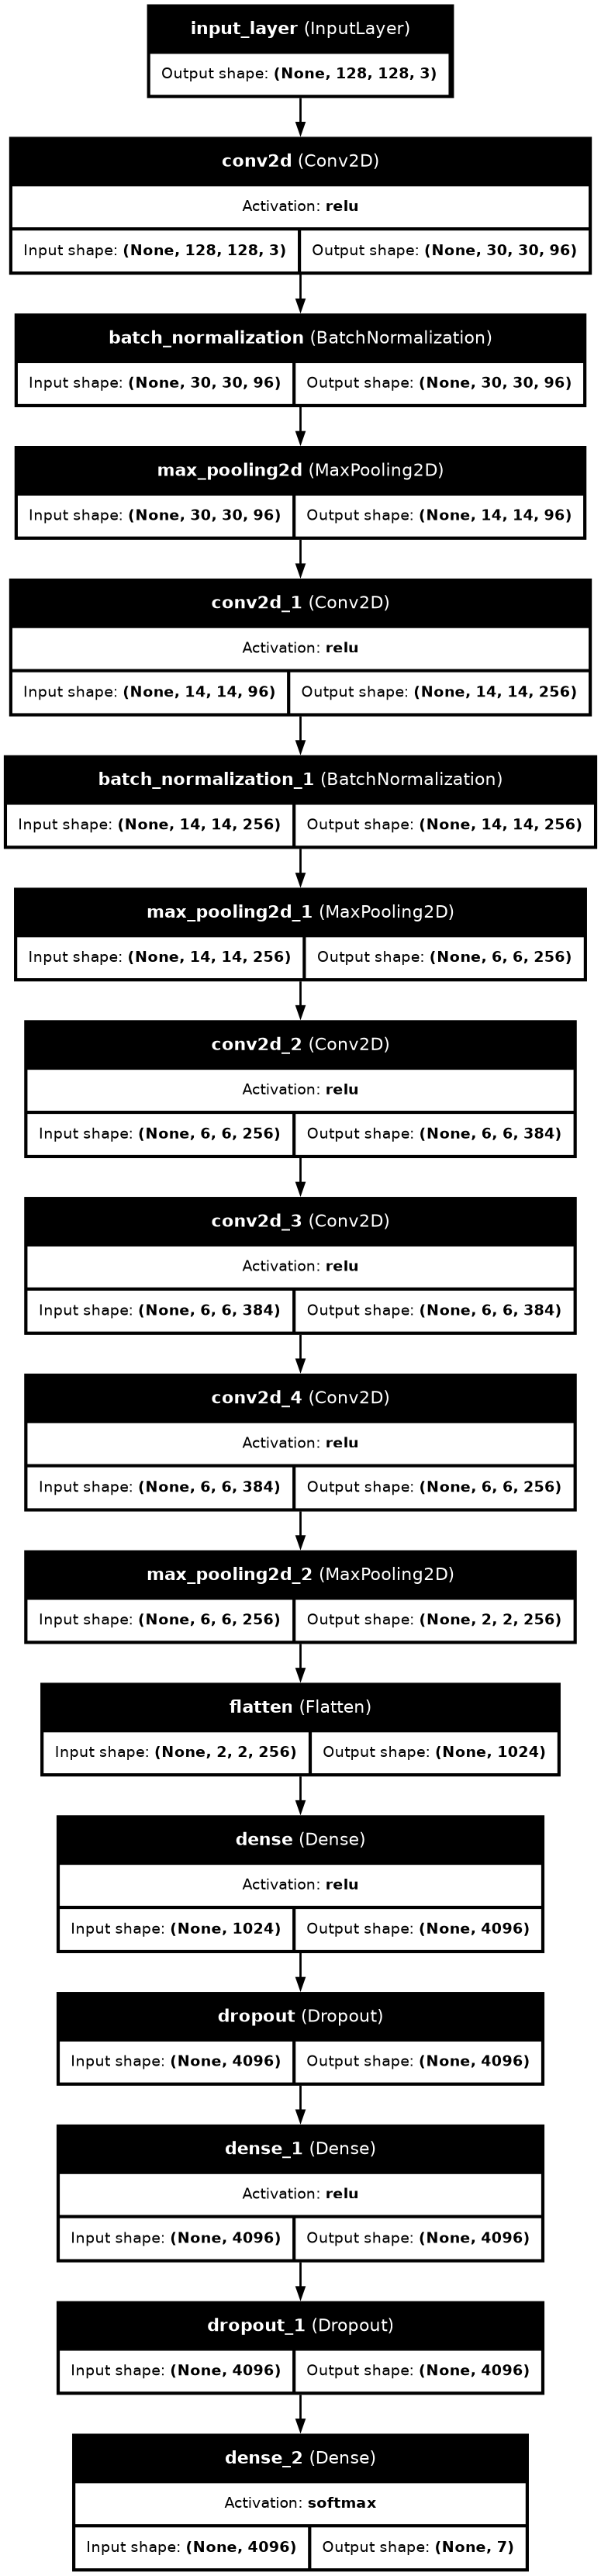

In [ ]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_Alex.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
Alex_model = model_Alex.fit(
    train_generator,
    validation_data=test_generator,
    epochs=75,
    callbacks=[reduce_lr,early_stopping]
)

Epoch 1/75


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/105 ━━━━━━━━━━━━━━━━━━━━ 27:46 16s/step - accuracy: 0.1250 - loss: 2.2955

I0000 00:00:1717950036.463410     137 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717950036.482110     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 44/105 ━━━━━━━━━━━━━━━━━━━━ 29s 480ms/step - accuracy: 0.2051 - loss: 2.0233

W0000 00:00:1717950057.061464     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


104/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.2413 - loss: 1.9367

W0000 00:00:1717950075.218144     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


105/105 ━━━━━━━━━━━━━━━━━━━━ 61s 431ms/step - accuracy: 0.2423 - loss: 1.9347 - val_accuracy: 0.2448 - val_loss: 1.8827 - learning_rate: 1.0000e-04
Epoch 2/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 213ms/step - accuracy: 0.3631 - loss: 1.7025 - val_accuracy: 0.2460 - val_loss: 1.9510 - learning_rate: 1.0000e-04
Epoch 3/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.3970 - loss: 1.6026 - val_accuracy: 0.1722 - val_loss: 2.0525 - learning_rate: 1.0000e-04
Epoch 4/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 207ms/step - accuracy: 0.4376 - loss: 1.5322 - val_accuracy: 0.4772 - val_loss: 1.5102 - learning_rate: 1.0000e-04
Epoch 5/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.4711 - loss: 1.4373 - val_accuracy: 0.4969 - val_loss: 1.3704 - learning_rate: 1.0000e-04
Epoch 6/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 203ms/step - accuracy: 0.5016 - loss: 1.3569 - val_accuracy: 0.5830 - val_loss: 1.2926 - learning_rate: 1.0000e-04
Epoch 7/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step - 

In [ ]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']

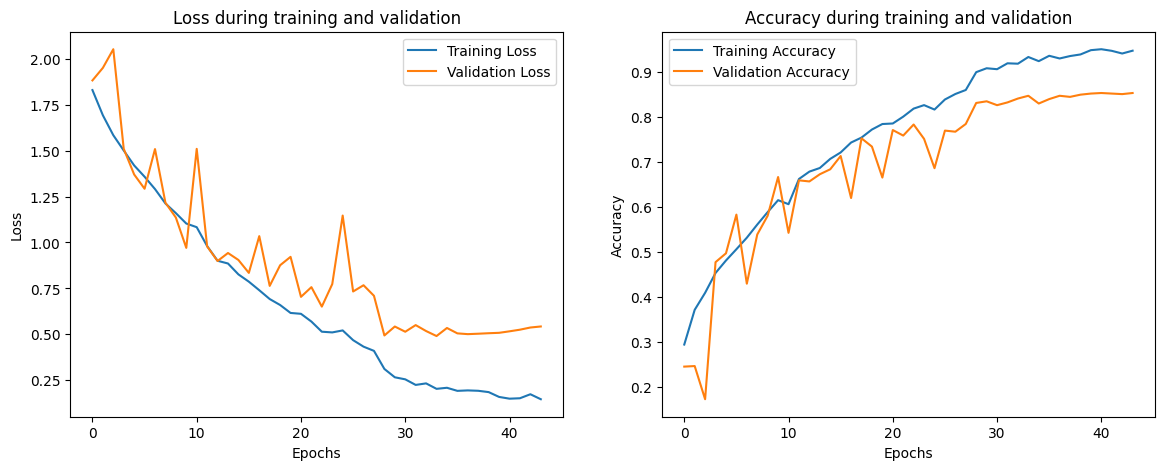

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss_alex, label='Training Loss')
plt.plot(val_loss_alex, label='Validation Loss')
plt.title('Loss during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_acc_alex, label='Training Accuracy')
plt.plot(val_acc_alex, label='Validation Accuracy')
plt.title('Accuracy during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **VGGNet**

In [ ]:
def VGGNet():
    inp = layers.Input((img_width, img_height, 3))
    x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(inp)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(7, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 512)      │         2,04

 Total params: 65,089,095 (248.30 MB)

 Trainable params: 65,086,151 (248.28 MB)

 Non-trainable params: 2,944 (11.50 KB)

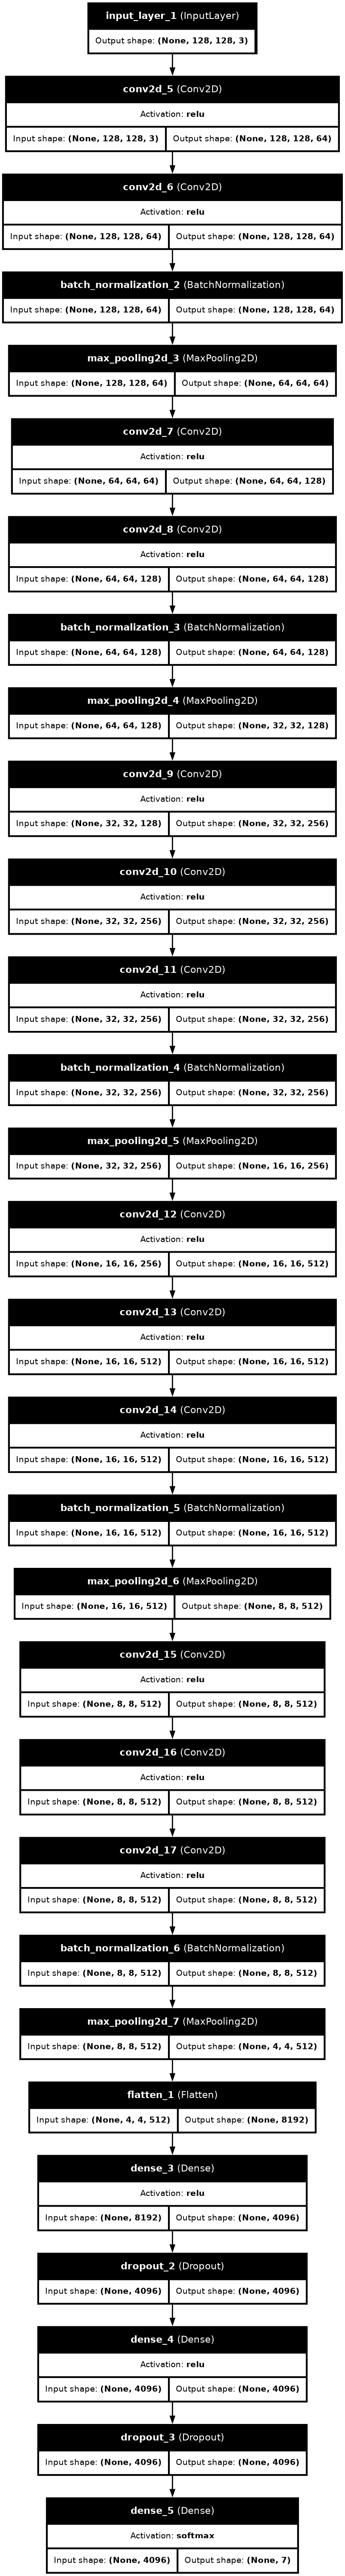

In [ ]:
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_VGG.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
VGG_model = model_VGG.fit(
    train_generator,
    validation_data=test_generator,
    epochs=75,
    callbacks=[reduce_lr,early_stopping]
)

Epoch 1/75
  1/105 ━━━━━━━━━━━━━━━━━━━━ 1:18:06 45s/step - accuracy: 0.1250 - loss: 3.4069

W0000 00:00:1717952740.575587     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.2025 - loss: 3.3962

W0000 00:00:1717952797.372079     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


105/105 ━━━━━━━━━━━━━━━━━━━━ 111s 638ms/step - accuracy: 0.2026 - loss: 3.3921 - val_accuracy: 0.2448 - val_loss: 2.0837 - learning_rate: 1.0000e-04
Epoch 2/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 215ms/step - accuracy: 0.2668 - loss: 2.0797 - val_accuracy: 0.2448 - val_loss: 2.5366 - learning_rate: 1.0000e-04
Epoch 3/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.3159 - loss: 1.8973 - val_accuracy: 0.1919 - val_loss: 2.4925 - learning_rate: 1.0000e-04
Epoch 4/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 223ms/step - accuracy: 0.3802 - loss: 1.7081 - val_accuracy: 0.2312 - val_loss: 2.5041 - learning_rate: 1.0000e-04
Epoch 5/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 225ms/step - accuracy: 0.4095 - loss: 1.6524 - val_accuracy: 0.1390 - val_loss: 2.8510 - learning_rate: 1.0000e-04
Epoch 6/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 26s 234ms/step - accuracy: 0.4301 - loss: 1.5419 - val_accuracy: 0.4231 - val_loss: 1.6385 - learning_rate: 1.0000e-04
Epoch 7/75
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 225ms/step -

In [ ]:
training_loss_vgg = VGG_model.history['loss']
val_loss_vgg = VGG_model.history['val_loss']
training_acc_vgg = VGG_model.history['accuracy']
val_acc_vgg = VGG_model.history['val_accuracy']


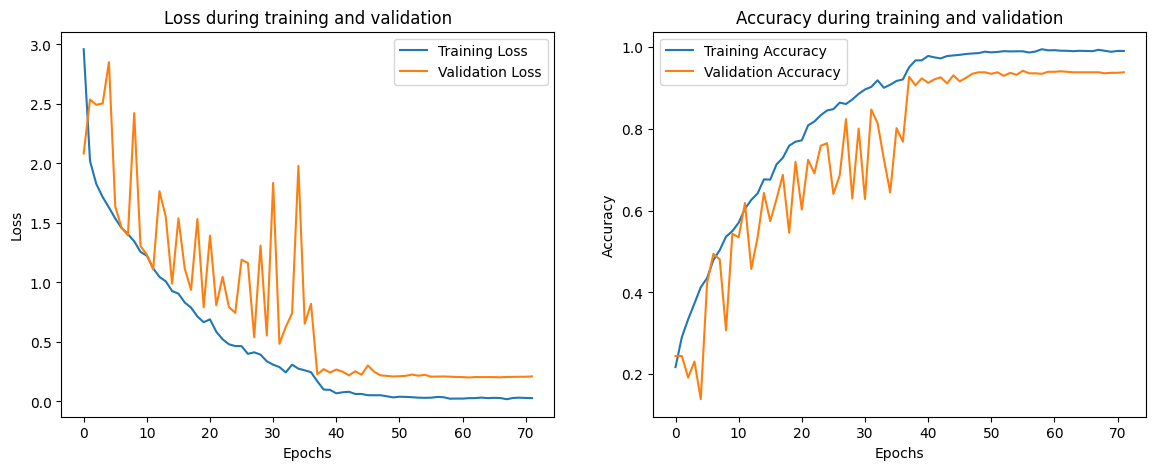

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss_vgg, label='Training Loss')
plt.plot(val_loss_vgg, label='Validation Loss')
plt.title('Loss during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_acc_vgg, label='Training Accuracy')
plt.plot(val_acc_vgg, label='Validation Accuracy')
plt.title('Accuracy during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **Resnet34**

In [ ]:
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=True):
    """A residual block."""
    if conv_shortcut:
        shortcut = layers.Conv2D(filters, 1, stride, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = x

    x = layers.Conv2D(filters, kernel_size, stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.ReLU()(x)
    return x

def ResNet34():
    inp = layers.Input((img_width, img_height, 3))
    x = layers.Conv2D(64, 7, 2, padding='same', activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64, conv_shortcut=False)
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(7, activation='softmax')(x)

    model_Res = models.Model(inputs=inp, outputs=x)
    return model_Res

model_Res = ResNet34()
model_Res.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_162 (Conv2D) │ (None, 64, 64,    │      9,472 │ input_layer_5[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_162[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_163 (Conv2D) │ (None, 32, 32,    │     36,928 │ max_pooling2d_11… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_163[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_96 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_164 (Conv2D) │ (None, 32, 32,    │     36,928 │ re_lu_96[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_164[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_48 (Add)        │ (None, 32, 32,    │          0 │ max_pooling2d_11… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_97 (ReLU)     │ (None, 32, 32,    │          0 │ add_48[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_166 (Conv2D) │ (None, 32, 32,    │     36,928 │ re_lu_97[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_166[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_98 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_165 (Conv2D) │ (None, 32, 32,    │      4,160 │ re_lu_97[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_167 (Conv2D) │ (None, 32, 32,    │     36,928 │ re_lu_98[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_165[0][0]

 Total params: 41,144,839 (156.96 MB)

 Trainable params: 41,122,183 (156.87 MB)

 Non-trainable params: 22,656 (88.50 KB)

In [ ]:
tf.keras.utils.plot_model(
    model_Res,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_Res.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=15,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
ResNet_model = model_Res.fit(
    train_generator,
    validation_data=test_generator,
    epochs=200,
    callbacks=[reduce_lr,early_stopping]
)

Epoch 1/200
  1/105 ━━━━━━━━━━━━━━━━━━━━ 1:22:14 47s/step - accuracy: 0.1562 - loss: 2.0629

W0000 00:00:1717964654.130042     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 84/105 ━━━━━━━━━━━━━━━━━━━━ 9s 466ms/step - accuracy: 0.2284 - loss: 1.9641 

W0000 00:00:1717964692.729575     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.2317 - loss: 1.9592

W0000 00:00:1717964699.537129     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


105/105 ━━━━━━━━━━━━━━━━━━━━ 97s 474ms/step - accuracy: 0.2319 - loss: 1.9590 - val_accuracy: 0.2448 - val_loss: 2.0547 - learning_rate: 1.0000e-04
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - accuracy: 0.2914 - loss: 1.8572 - val_accuracy: 0.1833 - val_loss: 2.8335 - learning_rate: 1.0000e-04
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 210ms/step - accuracy: 0.3117 - loss: 1.7857 - val_accuracy: 0.2485 - val_loss: 2.3797 - learning_rate: 1.0000e-04
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 207ms/step - accuracy: 0.3715 - loss: 1.7098 - val_accuracy: 0.3296 - val_loss: 1.7933 - learning_rate: 1.0000e-04
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 215ms/step - accuracy: 0.3781 - loss: 1.6590 - val_accuracy: 0.3592 - val_loss: 1.7911 - learning_rate: 1.0000e-04
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - accuracy: 0.3967 - loss: 1.6285 - val_accuracy: 0.3038 - val_loss: 1.8524 - learning_rate: 1.0000e-04
Epoch 7/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/s

In [ ]:
training_loss_resnet = ResNet_model.history['loss']
val_loss_resnet = ResNet_model.history['val_loss']
training_acc_resnet = ResNet_model.history['accuracy']
val_acc_resnet = ResNet_model.history['val_accuracy']

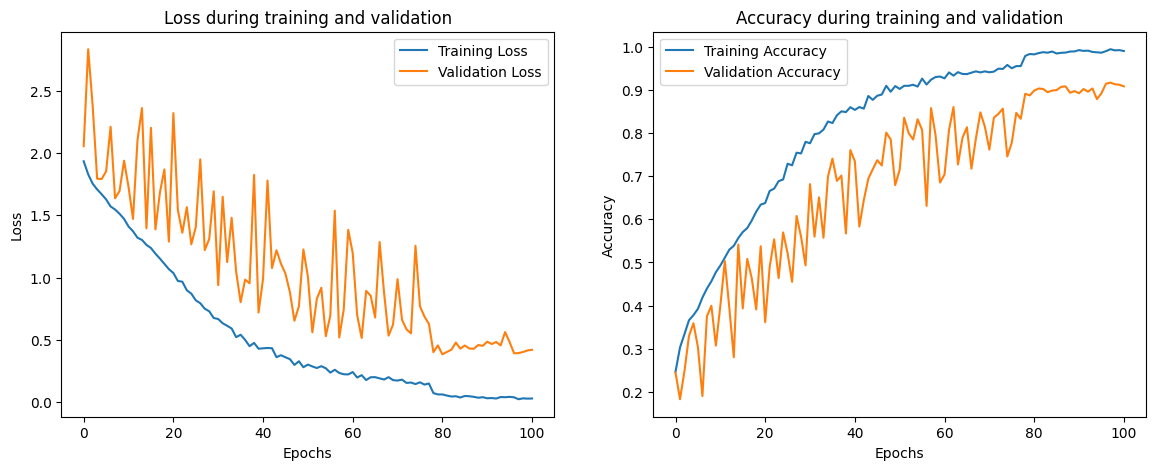

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss_resnet, label='Training Loss')
plt.plot(val_loss_resnet, label='Validation Loss')
plt.title('Loss during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_acc_resnet, label='Training Accuracy')
plt.plot(val_acc_resnet, label='Validation Accuracy')
plt.title('Accuracy during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **2 parallel CNN**

In [ ]:
def create_parallel_cnn(img_width, img_height, num_classes):
    # Input layer
    input_layer = Input(shape=(img_width, img_height, 3))

    # First CNN model
    cnn1 = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
    cnn1 = layers.MaxPooling2D(pool_size=(2, 2))(cnn1)
    cnn1 = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(cnn1)
    cnn1 = layers.MaxPooling2D(pool_size=(2, 2))(cnn1)
    cnn1 = layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same')(cnn1)
    cnn1 = layers.MaxPooling2D(pool_size=(2, 2))(cnn1)
    cnn1 = layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same')(cnn1)
    cnn1 = layers.MaxPooling2D(pool_size=(2, 2))(cnn1)
    cnn1 = layers.Flatten()(cnn1)

    # Second CNN model
    cnn2 = layers.Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
    cnn2 = layers.MaxPooling2D(pool_size=(2, 2))(cnn2)
    cnn2 = layers.Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same')(cnn2)
    cnn2 = layers.MaxPooling2D(pool_size=(2, 2))(cnn2)
    cnn2 = layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same')(cnn2)
    cnn2 = layers.MaxPooling2D(pool_size=(2, 2))(cnn2)
    cnn2 = layers.Conv2D(512, kernel_size=(5, 5), activation='relu', padding='same')(cnn2)
    cnn2 = layers.MaxPooling2D(pool_size=(2, 2))(cnn2)
    cnn2 = layers.Flatten()(cnn2)

    # Concatenate the outputs of the two CNN models
    combined = layers.concatenate([cnn1, cnn2])

    # Add fully connected layers
    combined = layers.Dense(4096, activation='relu')(combined)
    combined = layers.Dropout(0.5)(combined)
    output_layer = layers.Dense(num_classes, activation='softmax')(combined)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    return model

num_classes = len(train_generator.class_indices)
model = create_parallel_cnn(img_width, img_height, num_classes)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │      4,864 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    204,928 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │    819,456 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │  3,277,312 │ max_pooling2d_6[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 512) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 8, 8, 512) │          0 │ conv2d_7[0][0]  

 Total params: 274,325,767 (1.02 GB)

 Trainable params: 274,325,767 (1.02 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718033733.578816     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718033733.600222     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 67/105 ━━━━━━━━━━━━━━━━━━━━ 24s 651ms/step - accuracy: 0.2351 - loss: 1.9899

W0000 00:00:1718033776.599742     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.2438 - loss: 1.9493

W0000 00:00:1718033787.741237     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718033798.003882     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


105/105 ━━━━━━━━━━━━━━━━━━━━ 101s 643ms/step - accuracy: 0.2441 - loss: 1.9484 - val_accuracy: 0.3014 - val_loss: 1.7730 - learning_rate: 1.0000e-04
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.3702 - loss: 1.7432 - val_accuracy: 0.3506 - val_loss: 1.7760 - learning_rate: 1.0000e-04
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.4050 - loss: 1.6600 - val_accuracy: 0.4662 - val_loss: 1.5931 - learning_rate: 1.0000e-04
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.4309 - loss: 1.6008 - val_accuracy: 0.5154 - val_loss: 1.3681 - learning_rate: 1.0000e-04
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.4700 - loss: 1.4934 - val_accuracy: 0.4772 - val_loss: 1.4413 - learning_rate: 1.0000e-04
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - accuracy: 0.5084 - loss: 1.3794 - val_accuracy: 0.4797 - val_loss: 1.4627 - learning_rate: 1.0000e-04
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step -

In [ ]:
training_loss_resnet = history.history['loss']
val_loss_resnet = history.history['val_loss']
training_acc_resnet = history.history['accuracy']
val_acc_resnet = history.history['val_accuracy']

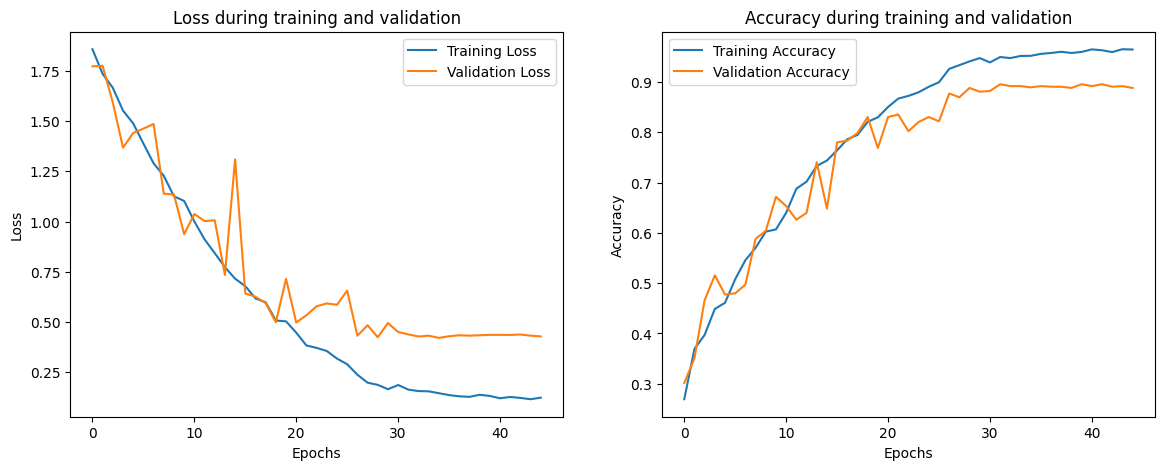

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss_resnet, label='Training Loss')
plt.plot(val_loss_resnet, label='Validation Loss')
plt.title('Loss during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_acc_resnet, label='Training Accuracy')
plt.plot(val_acc_resnet, label='Validation Accuracy')
plt.title('Accuracy during training and validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()